In [1]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

# Scaling

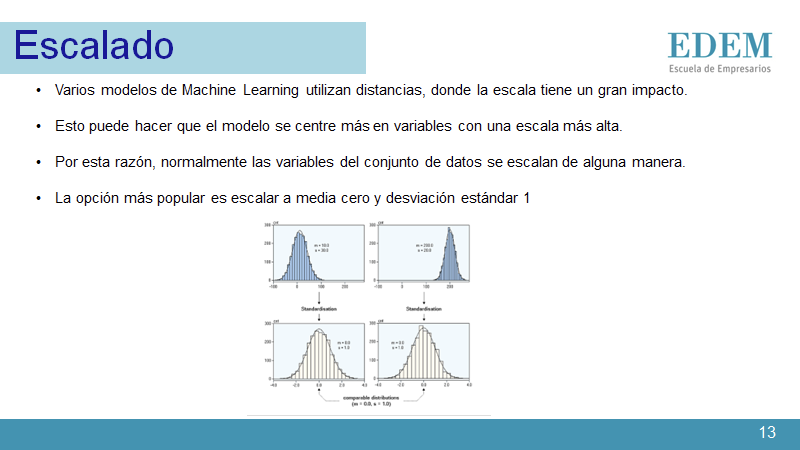

Varios modelos de aprendizaje automático utilizan distancias en algún momento de su proceso de optimización. Cuando se calculan las distancias, la escala de una variable tiene un gran impacto. Por lo tanto, si tiene variables con una escala más alta que otras, esto puede hacer que su modelo se centre más en estas variables que en aquellas con una escala más baja, incluso si estas últimas pueden ser más informativas con respecto al objetivo.

Por esta razón, normalmente las variables del conjunto de datos se escalan de alguna manera. La opción más popular es escalar a media cero y desviación típica 1.

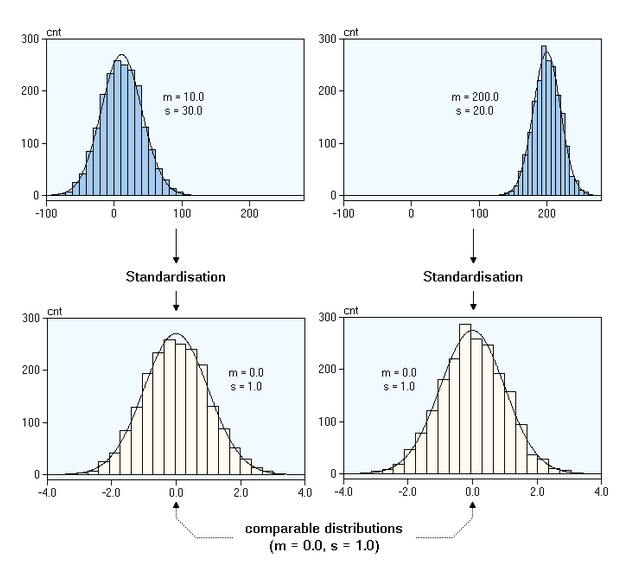

## Load Data

In [2]:
dat = pd.read_csv("../datasets/i2.csv", sep = ";")
dat = dat[['price', 'ant']] # Let's keep only numerical columns for this notebook
dat.head()

,price,ant
0,NaN,NaN
1,147.500000,38.0
2,24.049999,19.0
3,59.709999,8.0
4,37.299999,4.0


### Tipificar (mean = 0 & sd = 1)

In [3]:
from sklearn.preprocessing import scale
?scale

In [4]:
dat_scale = pd.DataFrame(scale(dat))
dat_scale.columns = dat.columns

In [5]:
dat

,price,ant
0,NaN,NaN
1,147.500000,38.0
2,24.049999,19.0
3,59.709999,8.0
4,37.299999,4.0
...,...,...
995,NaN,29.0
996,NaN,39.0
997,NaN,5.0
998,NaN,4.0


In [7]:
dat_scale

,price,ant
0,NaN,NaN
1,1.107713,0.553295
2,-0.847917,-0.265495
3,-0.283010,-0.739531
4,-0.638017,-0.911908
...,...,...
995,NaN,0.165447
996,NaN,0.596389
997,NaN,-0.868814
998,NaN,-0.911908


Comprobemos los valores de la media y la desviación típica antes y después del escalado.

In [20]:
dat.apply([np.mean, np.std])

,price,ant
mean,77.575121,25.160804
std,63.200565,23.216639


In [21]:
dat_scale.apply([np.mean, np.std])

,price,ant
mean,-2.676666e-17,-1.182750e-17
std,1.001190e+00,1.000503e+00


### min-max (0-1 range)

In [8]:
from sklearn.preprocessing import MinMaxScaler
?MinMaxScaler

In [9]:
scaler = MinMaxScaler()
scaler.fit(dat) # This should be dat_train
dat_scaled = pd.DataFrame(scaler.transform(dat))
dat_scaled.columns = dat.columns

In [10]:
dat

,price,ant
0,NaN,NaN
1,147.500000,38.0
2,24.049999,19.0
3,59.709999,8.0
4,37.299999,4.0
...,...,...
995,NaN,29.0
996,NaN,39.0
997,NaN,5.0
998,NaN,4.0


In [11]:
dat_scaled

,price,ant
0,NaN,NaN
1,0.366005,0.304
2,0.059677,0.152
3,0.148164,0.064
4,0.092556,0.032
...,...,...
995,NaN,0.232
996,NaN,0.312
997,NaN,0.040
998,NaN,0.032


Comprobemos los valores mínimo y máximo antes y después del escalado.

In [12]:
dat.apply([np.min, np.max])

,price,ant
amin,0.0,0.0
amax,403.0,125.0


In [40]:
dat_scaled.apply([np.min, np.max])

,price,ant
amin,0.0,0.0
amax,1.0,1.0


Comprobemos los valores de la media y la desviación típica antes y después del escalado.

In [13]:
dat.apply([np.mean, np.std])

,price,ant
mean,77.575121,25.160804
std,63.200565,23.216639


In [14]:
dat_scaled.apply([np.mean, np.std])

,price,ant
mean,0.192494,0.201286
std,0.156825,0.185733


## Definir Función

In [15]:
def scale_fun(X, numerical_variables, method = 'tipify'):
    dat_scaled = X.copy()
    if method == 'tipify':
        dat_scaled[numerical_variables] = pd.DataFrame(scale(X[numerical_variables]))
        
    elif method == 'min-max':
        # 3) Define
        scaler = MinMaxScaler()
        
        # 4) Train
        scaler.fit(dat[numerical_variables])
        
        # 5) Predict/Transform
        dat_scaled[numerical_variables] = pd.DataFrame(scaler.transform(X[numerical_variables]))
        
    return dat_scaled

In [16]:
dat_scaled = scale_fun(dat, 
                       numerical_variables = ['price', 'ant'])
dat_scaled[['price', 'ant']].apply([np.min, np.max, np.mean, np.std])

,price,ant
amin,-1.228904e+00,-1.084285e+00
amax,5.155208e+00,4.302492e+00
mean,-2.676666e-17,-1.182750e-17
std,1.001190e+00,1.000503e+00


In [17]:
dat_scaled = scale_fun(dat, 
                       numerical_variables = ['price', 'ant'],
                      method = 'min-max')
dat_scaled[['price', 'ant']].apply([np.min, np.max, np.mean, np.std])

,price,ant
amin,0.000000,0.000000
amax,1.000000,1.000000
mean,0.192494,0.201286
std,0.156825,0.185733
